<h1>1. Load and Explore the Dataset</h1>

In [200]:
# Load the digits data set from sklearn and split into test and training data
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load digits from sklearn.datasets
digits = load_digits()

# Display shape of features and label data
print(f"Total Sample: {digits.data.shape[0]}")
print(f"Dimensionality: {digits.data.shape[1]}")

# Randomly split data with 500 test samples
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, train_size=0.722, random_state=42, shuffle=True)

# Display shape of data to verify split
print("-----------------------")
print(f"X_train size: {X_train.shape}")
print(f"y_train size: {y_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_test size: {y_test.shape}")

Total Sample: 1797
Dimensionality: 64
-----------------------
X_train size: (1297, 64)
y_train size: (1297,)
X_test size: (500, 64)
y_test size: (500,)


<h1>2. Visualize Training Data</h1>

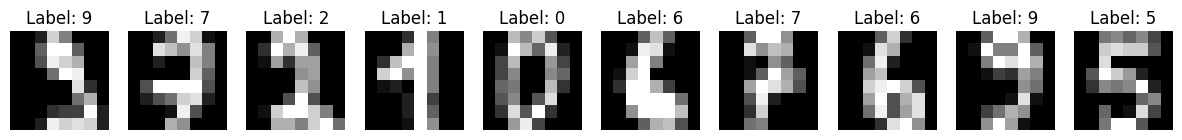

In [201]:
# Use matplotlib to display randomly selected digits
import matplotlib.pyplot as plt
import random

# Select 10 random samples from X_train
num_samples = X_train.shape[0]
digit_idx = random.sample(range(0, num_samples), 10)

# Display the images in a grid using matplotlib
fig, axs = plt.subplots(1,10, figsize=(15,5))
for idx, digit in enumerate(digit_idx):
    axs[idx].axis('off')
    axs[idx].imshow(X_train[digit].reshape(8,8), cmap='gray')
    # Assign each digit its corresponding label
    axs[idx].set_title(f"Label: {y_train[digit]}")

<h1>3. Implement the k-Nearest Neighbor Classifier</h1>

In [202]:
# Train multiple k-NN classifiers using sklearn KNeightborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Train 5 seperate classifiers with k = 1, 3, 5, 7, and 9
k = [1, 3, 5, 7, 9]
knn_classifiers = []
for n_neighbors in k:
    print(f"Training classifier: k = {n_neighbors}")
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Fit each model with X_train and y_train
    classifier.fit(X_train, y_train)
    knn_classifiers.append(classifier)
print("Classifiers trained successfully.")

Training classifier: k = 1
Training classifier: k = 3
Training classifier: k = 5
Training classifier: k = 7
Training classifier: k = 9
Classifiers trained successfully.


<h1>4. Evaluate and Compare Classifiers</h1>

*Note you have to install the tabulate library using the following function in your command line*

***pip install tabulate***

*otherwise the dataframe containing F1 scores will not print properly*

In [203]:
# Compare classifier performance for differnt k values using F1 score
from sklearn.metrics import f1_score
import pandas as pd

# For each classifier predict the labels of X_test and calculate F1 score
scores = []
for classifier in knn_classifiers:
    prediction = classifier.predict(X_test)
    # Calculate F1 score with average='weighted'
    f1 = f1_score(y_true=y_test, y_pred=prediction, average='weighted')
    scores.append((classifier.n_neighbors, f1))

# Display F1 scores in table via pandas dataframe for each k value
df = pd.DataFrame(scores, columns=('k', 'F1_score'))
print(df.to_markdown(index=False))

|   k |   F1_score |
|----:|-----------:|
|   1 |   0.984033 |
|   3 |   0.989941 |
|   5 |   0.993981 |
|   7 |   0.991967 |
|   9 |   0.98189  |


*Summarize findings in a Markdown cell, discussing any patterns or trends observed across different k values, including changes in F1 scores*

For the five k values listed we see excellent results. In general an F1 score of 0.9 or more means your model is pretty accurate. All of our k values have an F1 score of 0.98 or greater. However we do observe improvement from k=1 -> k=5 starting at 0.984... maxing out at 0.993..., subsequent k's past a value of 5 start to degrade in F1 score. I would be interested in seeing what occurs for higher k values. I predict the F1 score will begin to degrade as we increase k.


<h1>5. Visualize Qualitative Predictions</h1>

K: 1


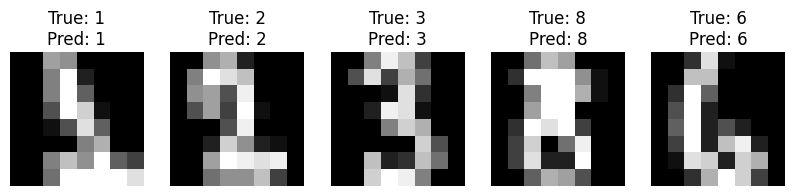

K: 3


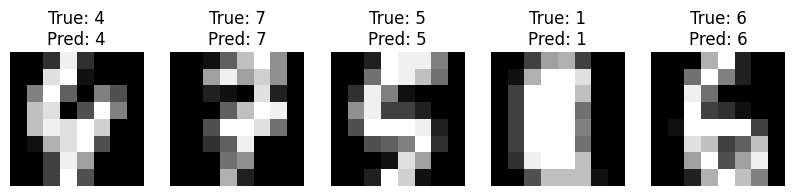

K: 5


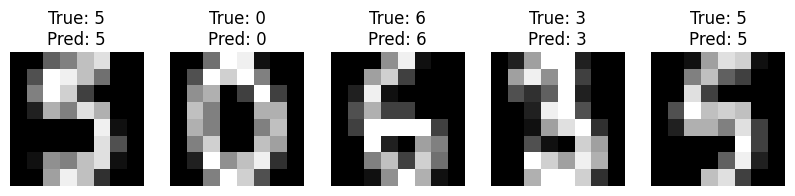

K: 7


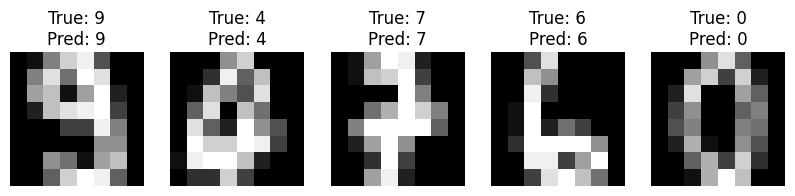

K: 9


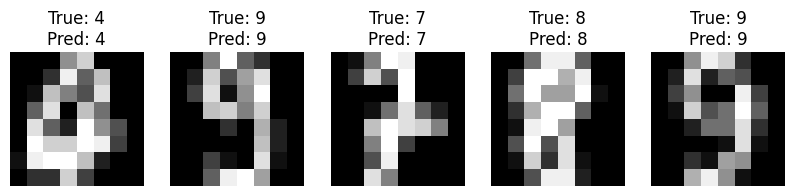

In [204]:
# Evaluate classifiers via qualitatively observations
num_samples = X_test.shape[0]
for classifier in knn_classifiers:

    # For each classifier select a few random digits
    digit_idx = random.sample(range(0, num_samples), 5)
    fig, axs = plt.subplots(1,5, figsize=(10,5))

    # Predict label for each digit
    y_pred = classifier.predict(X_test[digit_idx])

    # Display each plot with the classifier's k value
    print(f"K: {classifier.n_neighbors}")

    for idx, digit in enumerate(digit_idx):
        axs[idx].axis('off')
        axs[idx].imshow(X_test[digit].reshape(8,8), cmap='gray')
        # Display each digit with its predicted label and true label
        axs[idx].set_title(f"True: {y_test[digit]}\nPred: {y_pred[idx]}")
    plt.show()

*In a concluding Markdown cell, reflect on the results, noting any pat-terns or observations, especially for cases where predictions were correct or incorrect.*

In conclusion, using k=5 seems to be best for classification. Looking through the documentation for sklearns KNeighborsClassifier,
they also set the n_neighbors parameter for the model to 5 by default suggesting to me that computer scientists before me have done the tests
and came to a similar conclusion. I also observed via qualitative observation that both k=9 and k=1 misclassify more often than the other k
value's which supports my hypothesis.